다중손잡이 밴딧문제

OpenAPI재단 제공 GYM 라이브러리

다중손잡이 밴딧문제
  - $1을 넣고 여러손잡이중 하나를 골라 당기면 $1 잃거나 땀
  - 손잡이 마다 승률이 정해져 있으나 사용자는 모름
  - 행동집합 = {손잡이1,손잡이2,손잡이3,손잡이4,손잡이5}
  - 보상의 집합 = {-1,1}
  - 행동->보상 사이클

행동->상태변화->보상 사이클에서 상태가 없는 단순한 문제

정책
  - 탐험형 정책, 탐사형 정책
  - 양 극단
    - 처음부터 끝까지 무작위로 선택하는 극단적인 탐험형 정책
    - 몇번 시도해 보고 이후에는 그때까지의 승률이 가장 높은 손잡이만 당기는 탐사형
  - 둘 사이의 균형이 중요함
    - 현재 가장 높은 확률을 보인 손잡이를 더 자주 당기지만 일정한 비율로 다른 손잡이도 시도하는 정책

- 에피소드(episode) : 게임을 시작해서 마칠때까지의 기록
- 에피소드가 충분히 길면 최적정책을 알아낼수 있음
- 현실은 그렇지 않다.

랜덤정책을 쓰는 알고리즘

In [20]:
import numpy as np
arms_profit = [0.4, 0.12, 0.52, 0.6, 0.25]  # 손잡이 승률(사용자는 모름)
n_arms = len(arms_profit)
n_trial = 10000

# 손잡이를 당기는 시뮬레이션
def pull_bandit(handle):  # handle 손잡이 번호
  q = np.random.random()
  if q < arms_profit[handle]:
    return 1
  else:
    return -1

In [21]:
# 랜덤정책 모방
def random_exploration():
  episode = []
  num = np.zeros(n_arms)  # 손잡이 별로 당긴 횟수
  wins = np.zeros(n_arms)  # 손잡이 별로 승리 횟수
  for i in range(n_trial):
    h = np.random.randint(0,n_arms)# 0~ 4까지 임의의 수== 핸들 번호
    reward = pull_bandit(h)
    episode.append([h,reward])
    num[h] += 1
    wins[h] +=1 if reward== 1 else 0
  return episode,(num,wins)

In [40]:
e,r = random_exploration()

In [41]:
r

(array([1998., 2016., 2041., 1949., 1996.]),
 array([ 806.,  253., 1063., 1169.,  482.]))

In [42]:
print("손잡이별 승리 확률 : ", ["%6.4f"%( r[1][i] / r[0][i]) if r[0][i] > 0 else 0.0  for i in range(n_arms)] )
print("손잡이별 수익 : ", [ 2*r[1][i]-r[0][i]  for i in range(n_arms) ] )
print("순 수익 : ", sum(np.asarray(e)[:,1]) )

손잡이별 승리 확률 :  ['0.4034', '0.1255', '0.5208', '0.5998', '0.2415']
손잡이별 수익 :  [-386.0, -1510.0, 85.0, 389.0, -1032.0]
순 수익 :  -2454


 E(epsilon) - 탐욕 알고리즘(greedy algorithm)
  - 과거와 미래를 전혀 고려하지 않고 현재 순간의 정보만 가지고 현재 최고 유리한 선택을 하는 알고리즘
  - 탐사형에 가까운 알고리즘
  - 기본적으로 탐욕알고리즘을 취하는데 E 비율만큼 탐험을 적용해서 탐사와 탐험의  균형을 추가

In [43]:
def epsilon_greedy(eps):
  episode = []
  num = np.zeros(n_arms)  # 손잡이 별로 당긴 횟수
  wins = np.zeros(n_arms)  # 손잡이 별로 승리 횟수
  for i in range(n_trial):
    r = np.random.random()

    if(r < eps or sum(wins)==0):  #랜덤정책으로 손잡이를 선택
      h = np.random.randint(0,n_arms)# 0~ 4까지 임의의 수== 핸들 번호
    else:  # 이때까지 추정한 확률에 따라서 손잡이를 선택
      prob = np.asarray( [wins[i]/num[i] if num[i]>0 else 0.0 for i in range(n_arms)] )
      prob = prob / sum(prob)
      h = np.random.choice(range(n_arms), p = prob)

    reward = pull_bandit(h)
    episode.append([h,reward])
    num[h] += 1
    wins[h] +=1 if reward== 1 else 0
  return episode,(num,wins)

In [52]:
e,r = epsilon_greedy(0.1)
print("손잡이별 승리 확률 : ", ["%6.4f"%( r[1][i] / r[0][i]) if r[0][i] > 0 else 0.0  for i in range(n_arms)] )
print("손잡이별 수익 : ", [ 2*r[1][i]-r[0][i]  for i in range(n_arms) ] )
print("순 수익 : ", sum(np.asarray(e)[:,1]) )

손잡이별 승리 확률 :  ['0.3943', '0.1176', '0.5176', '0.6039', '0.2422']
손잡이별 수익 :  [-431.0, -546.0, 98.0, 633.0, -726.0]
순 수익 :  -972


몬테카를로 방법
  - 현실 세계의 현상 또는 수학적 현상을 난수를 생성해서 시뮬레이션 하는 기법
  - random_exploration, epsilon_greedy 함수도 몬테카를로 방법임  

OpenAI의 gym 라이브러리
  - OpenAI 재단이 만들어서 배포하는 라이브러리, 여러 강화학습 문제를 제공
  - FrozenLake, CartPole....

FrozenLake 문제
  - s에서 시작을 해서 g에 도착하면 이기는 게임
  - f는 얼어있어 밟고 지날수 있으나 h는 구멍이라서 빠지면 짐(f,h는 감춰져있음)
  - 4 x 4 행렬...
  - 현재 있는곳이 상태(16가지{0,1,2.. 15}), 좌우상하 이동이 행동(4가지행동{Left,Down,Right,Up})


  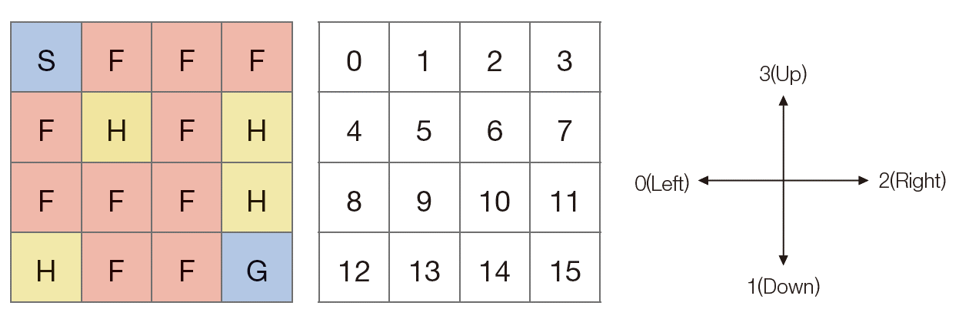

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

Discrete(16)
Discrete(4)
에피소드 끝


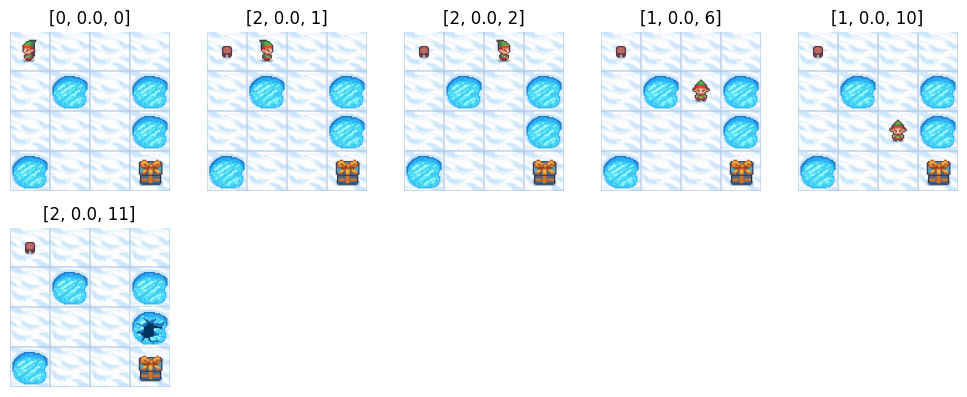

[[0, 0.0, 0], [2, 0.0, 1], [2, 0.0, 2], [1, 0.0, 6], [1, 0.0, 10], [2, 0.0, 11]]


In [92]:
# https://www.gymlibrary.dev/environments/toy_text/frozen_lake/
import matplotlib.pyplot as plt

import gym
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
print(env.observation_space)
print(env.action_space)
n_trial = 20
# 에피소드 수집
env.reset()
episode = []
plt.figure(figsize=(10,8))
for i in range(n_trial):
  action = env.action_space.sample()  # 랜덤하게 행동(좌하우상)
  obs,reward,done,info =  env.step(action) # action이 지정한 행동을 수행하고 (새로운상태, 보상, 에피소드 끝 여부, 부가정보) 반환
  episode.append([action,reward,obs])
  # env.render()
  image_data = env.render(mode='rgb_array')
  image_data = np.asarray(image_data,dtype=np.uint8)
  plt.subplot(4,5,i + 1)
  plt.imshow(image_data)
  plt.axis('off')
  plt.title([action,reward,obs])
  if done:
    print('에피소드 끝')
    break

plt.tight_layout() # 그림 간격 조정
plt.show()
print(episode)
env.close()
# 목표에 도달하면 1.0이고 F면 0.0 구멍에빠지면 끝

In [ ]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
print(env.observation_space)
print(env.action_space)
n_trial = 20
# 에피소드 수집
env.reset()
episode = []

for i in range(n_trial):
  action = env.action_space.sample() # 랜덤하게 행동(좌하우상)
  obs, reward, done, info = env.step(action) # action이 지정한 행동을 수행하고, (새로운 상태, 보상, 에피소드 끝 여부, 부가정보) 반환
  episode.append([action, reward, obs])
  # env.render()
  plt.figure(figsize=(2,2))
  plt.imshow(env.render(mode='rgb_array'))
  plt.title([action, reward, obs])
  plt.axis('off')
  plt.show()
  if done:
    print("에피소드 끝")
    break
print(episode)
env.close()
# 목표에 도달하면 보상은 1.0, 구멍에 빠지면 0.0,